In [16]:
# 방법1 : access token을 직접 입력하는 방법
# from huggingface_hub import notebook_login
# notebook_login()

# 방법2 : 환경변수에 저장, 로딩해서 인정하는 방법
from huggingface_hub import login
from dotenv import load_dotenv
import os

# 1️⃣ .env 파일의 내용을 로드
load_dotenv(override=True)

# 2️⃣ 환경 변수 가져오기
HF_READ_TOKEN = os.getenv("HF_READ_TOKEN")
# print(HF_READ_TOKEN)

# 로그인 실행
login(HF_READ_TOKEN)

In [17]:
from transformers import pipeline

## 이미지 인식

In [18]:
classifier = pipeline("image-classification")

No model was supplied, defaulted to google/vit-base-patch16-224 and revision 3f49326 (https://huggingface.co/google/vit-base-patch16-224).
Using a pipeline without specifying a model name and revision in production is not recommended.
Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.
Device set to use cuda:0


In [19]:
img_path = "datas/자동차.jpg"
things = classifier(img_path)


In [20]:
things[0]['label']

'sports car, sport car'

## 객체탐지

In [21]:
# object detection
# detector = pipeline("object-detection")

In [22]:
# %pip install timm

In [23]:
import timm
print(timm.__version__)

1.0.21


In [24]:
image_path = 'datas/도로.jpg'
results = detector(image_path)

In [25]:
results

[{'score': 0.8536606431007385,
  'label': 'traffic light',
  'box': {'xmin': 75, 'ymin': 395, 'xmax': 87, 'ymax': 415}},
 {'score': 0.9559164047241211,
  'label': 'traffic light',
  'box': {'xmin': 681, 'ymin': 390, 'xmax': 692, 'ymax': 412}},
 {'score': 0.9785963296890259,
  'label': 'car',
  'box': {'xmin': 499, 'ymin': 417, 'xmax': 563, 'ymax': 458}},
 {'score': 0.99622642993927,
  'label': 'car',
  'box': {'xmin': 554, 'ymin': 428, 'xmax': 624, 'ymax': 461}},
 {'score': 0.9262921214103699,
  'label': 'car',
  'box': {'xmin': 620, 'ymin': 425, 'xmax': 655, 'ymax': 454}},
 {'score': 0.5054342150688171,
  'label': 'truck',
  'box': {'xmin': 171, 'ymin': 423, 'xmax': 227, 'ymax': 456}},
 {'score': 0.9724722504615784,
  'label': 'car',
  'box': {'xmin': 990, 'ymin': 424, 'xmax': 1040, 'ymax': 460}},
 {'score': 0.6272181272506714,
  'label': 'car',
  'box': {'xmin': 966, 'ymin': 382, 'xmax': 1011, 'ymax': 399}},
 {'score': 0.9823861122131348,
  'label': 'car',
  'box': {'xmin': 814, 'ymi

In [26]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

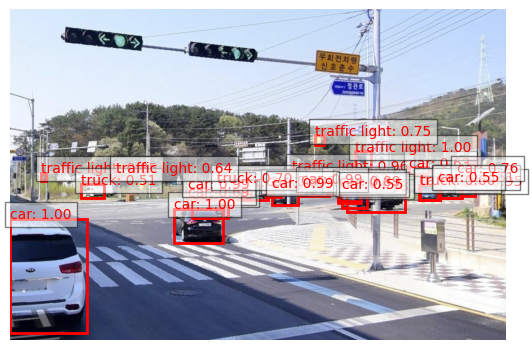

In [27]:
image = plt.imread(image_path)
fig, ax = plt.subplots(1)
ax.imshow(image)

for result in results:
    xmin = int(result['box']['xmin'])
    ymin = int(result['box']['ymin'])
    xmax = int(result['box']['xmax'])
    ymax = int(result['box']['ymax'])
    width = xmax - xmin
    height = ymax - ymin
    score = result['score']
    label = result['label']

    rect = patches.Rectangle((xmin, ymin), width, height, linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    ax.text(xmin, ymin, f'{label}: {score:.2f}', color='r', fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

plt.axis('off')
plt.show()

In [28]:
from diffusers import DiffusionPipeline
import torch

In [29]:
pipe = DiffusionPipeline.from_pretrained('runwayml/stable-diffusion-v1-5')

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


LookupError: <ContextVar name='shell_parent' at 0x000001917FCB6C00>